## Interpretações de exercício envolvendo interpolação e soluções de equações diferenciais

Documento criado com o objetivo de apresentar o entendimento do conteúdo de interpolação e soluções numéricas de equações diferenciais da disciplina de matemática computacional (CAP-239-4), do curso de pós-graduação em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais

Docentes:
- Dr. Leonardo B. L. Santos
- Dr. Reinaldo Rosa

Discente:
- Felipe Menino Carlos


Para tal interpretação, o seguinte exercício foi considerado:

Considere o problema de valor inicial $y(1) = 1$ da equação diferencial $y' = f(x) = 2x + 3$

Sabendo que $y(3) = 15$ e $y(4) = 25$, apresente $y(2)$

- a) Por interpolação de 1° grau;
- b) Por interpolação de 2° grau;
- c) Por solução numérica da equação diferencial
- d) Quais motivações, necessidades e aproximações em cada abordagem ? Se não fossem fornecidos y(3) e y(4), como seria feito para os itens `a` e `b` ? 

In [1]:
addpath('../listas/lista_5/src/') % Funções auxiliares

Antes de começar as questões, façamos inicialmente a visualização dos pontos que já foram disponibilizados pelo problema, isto pode direcionar melhor os passos a serem tomados nos exercícios subsequentes.

In [2]:
xo = [1 3 4];
yo = [1 15 25];

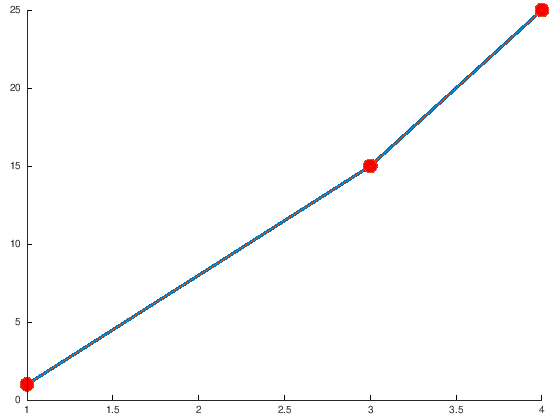

In [3]:
figure()
hold on
plot(xo, yo, 'linewidth', 8);
plot(xo, yo, 'Marker', 'o', 'MarkerSize', 13, 'MarkerFaceColor', 'red');
hold off

<hr>

**a) Por interpolação de 1° grau**

Para este tópico, considerando o conhecimento prévio sobre a disposição dos pontos do problema, é possível afirmar que a interpolação de 1° grau não terá sucesso ao ser aplicada neste conjunto de pontos.

Em outros contextos, como por exemplo, em casos que os pontos são colineares, tal interpolação poderia ser utilizada. 

Como forma de não deixar o exercício sem nenhuma solução, o que pode ser feito é a escolha de um par de pontos únicos para a interpolação.

Começando primeiro com os pontos [1 3]

In [4]:
x = [1 3];
y = [1 15];

A interpolação será feita via sistema linear. Para tal, a matriz de vandermond é gerada e os coeficientes são calculados.

In [5]:
p0Params = vander(x) \ y';

Após a geração dos coeficientes é possível realizar a interpolação nos intervalos interpolados.

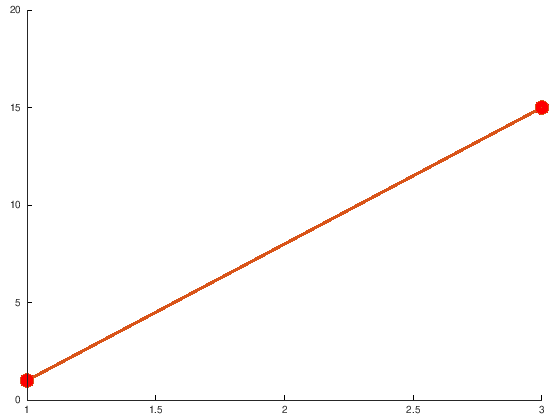

In [6]:
figure()
hold on
plot(polyval(p0Params, 1:3), 'linewidth', 8, 'color', 'w')
plot(x, y, 'Marker', 'o', 'MarkerSize', 13, 'MarkerFaceColor', 'red', 'linewidth', 8)
hold off

Porém, ainda existem pontos que precisam ser considerados, como apresentado abaixo, para esses o mesmo processo de interpolação separa, considerando apenas um conjunto de pontos pode ser feita.

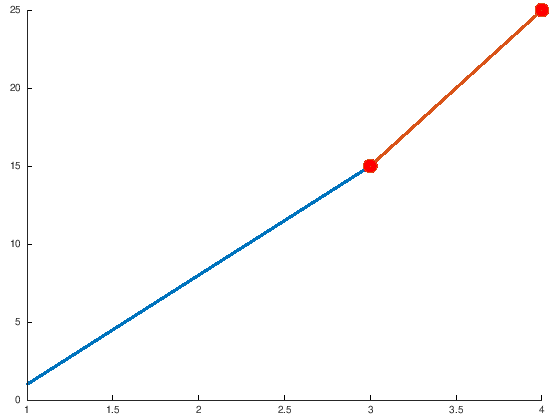

In [7]:
figure()
hold on
plot(polyval(p0Params, 1:3), 'linewidth', 8)
plot(xo(2:end), yo(2:end), 'Marker', 'o', 'MarkerSize', 13, 'MarkerFaceColor', 'red',  'linewidth', 8)
hold off

A discussão por trás deste exercício é que, não existe a possibilidade de realizar o processo de interpolação de 1° grau considerando os pontos do exercício e sua disposição. O fato da interpolação necessitar de um polinômio que passa por todos os pontos gera tal impossibilidade, em outros contextos, de generalização por exemplo, tais pontos poderia ser considerados e utilizados sem problemas.

Na questão original do exercício é pedido que o valor de $y(2)$ seja identificado, como o intervalo [1 3] foi interpolado, este pode ser obtido sem problemas.

In [8]:
polyval(p0Params, 2)

ans =  8


<hr>

**b) Por interpolação de 2° grau**

Diferente da questão anterior, com os pontos dispostos, é possível realizar a interpolação de 2° grau. Para tal o método de lagrange foi utilizado, o resultado é apresentado abaixo.

$$
x^2 + 3x - 3
$$

Para visualizar a forma geradora do polinômio, o mesmo será aplicado a um conjunto de pontos em $x$ dentro do domínio interpolado.

In [9]:
interpFnc = @(x) x.^2 + 3.*x -3;

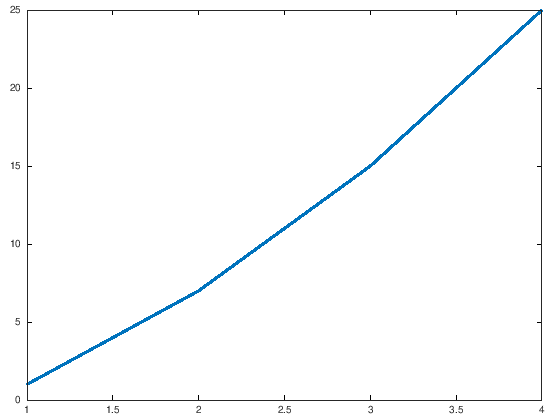

In [10]:
plot(interpFnc(1:1:max(xo)), 'linewidth', 8)

Com o resultado desta interpolação é possível obter o valor de $y(2)$ requisitado pelo exercício.

In [11]:
interpFnc(2)

ans =  7


<hr>

**c) Por solução numérica da equação diferencial**

Para a solução desta questão é aplicado o método de RungeKutta de 4° ordem e com a aproximação da função, os valores requisitados podem ser obtidos.

In [12]:
exercise = @(x) 2*x + 3;
[x, y] = rungeKuttaSolverEDO(1, 5, 1, 1, exercise);

Visualizando o domínio da solução específica aproximada pelo método de RungeKutta.

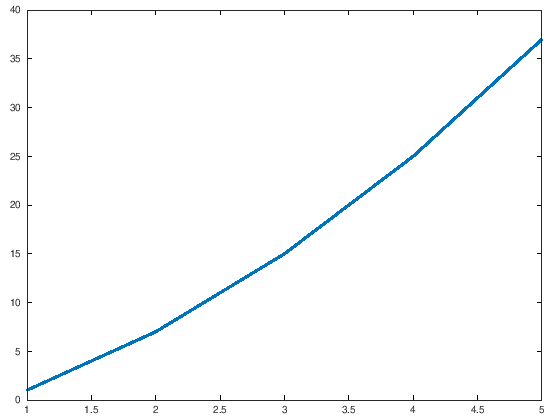

In [13]:
plot(x, y, 'linewidth', 8);

In [14]:
y(2) % Resultado da aproximação

ans =  7


<hr>

**d) Quais motivações, necessidades e aproximações em cada abordagem ? Se não fossem fornecidos y(3) e y(4), como seria feito para os itens a e b ?**

*Para responder aos pontos relacionados a motivação, foi desconsiderado os requisitos do exercício e considerado o contexto global da matéria*

Considerando inicialmente o método de interpolação linear, para os pontos que estão sendo trabalhados, esta pode não ser a melhor escolha para a apresentação dos melhores resultados de aproximação, porém, sua simplicidade faz com que em certos contextos seja possível sua aplicação.

Para o caso da interpolação de 2° grau, este método tem sua motivação de uso explicada nos dados, para o método de interpolação de Lagrange por exemplo é tido que para um polinômio interpolador $P_{n - 1}(x)$ é necessário existir uma quantidade $n$ de pontos no conjunto de dados, o que é justamente a condição que os dados apresentam.

Já os métodos de RK4 tem certas propriedades interessantes, e sua utilização para a interpolação de um determinado conjunto de pontos pode ser aplicada, fazendo com que exista uma boa relação de custo com qualidade dos resultados.

Na segunda parte da questão é apresentado uma questão, considerando que os pontos `y(3)` e `y(4)` não estivessem disponíveis. Bem, neste caso é completamente possível utilizar o método de RK de 4° ordem para aproximar a função e obter os pontos, se esses fossem exigidos pelo exercício, ou mesmo, através do próprio método RK4 já obter o resultado de $y(2)$ exigido pelo exercício. 

Para a geração desta resposta foi considerado que o método de RK4, enquanto faz a aproximação da função, é capaz de mapear diferentes famílias de soluções, estas sendo geradas de acordo com o `valor inicial` aplicado. A Figura abaixo apresenta tal propriedade, variando o `valor inicial` considerado.

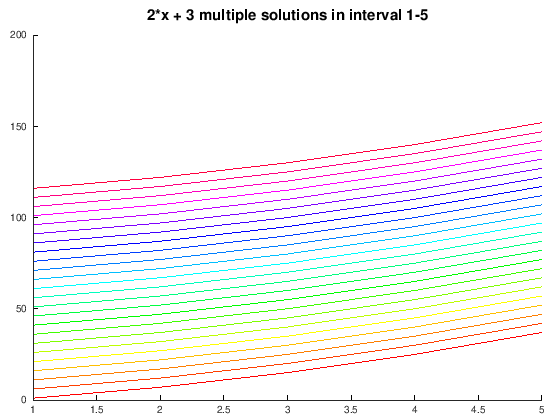

In [15]:
titulo = '2*x + 3 multiple solutions in interval 1-5';
h = 5;
solutions = 120;
cmap = hsv(solutions);

figure
hold on
for i=1:h:solutions
  [x, y] = rungeKuttaSolverEDO(1, 5, 1, i, exercise);
  plot(x, y, 'Color', cmap(i, :), 'linewidth', 1.8);
endfor
title(titulo, 'fontsize', 15)
hold off

Comparando o resultado de cada uma das abordagens para a obtenção do valor $y(2)$

- Interpolação linear (Polinômio de 1° grau): 8
- Interpolação 2° grau (Polinômio de 2° grau): 7
- Através de aproximação de RK4: 7

Calculando o erro relativo $ ErroRelativo = \frac{|y - \overline{y}|}{|y|}$, considerando o valor 7, obtido com o cálculo analítico, como verdade, é possível perceber que, as abordagens não possuem erro muito elevado.

Erro relativo do método de interpolação linear

In [16]:
relativeError(7, 8)

ans =  0.14286


Erro relativo do método de interpolação de 2° grau

In [17]:
relativeError(7, 7)

ans = 0


Erro relativo do método de RK4

In [18]:
relativeError(7, 7)

ans = 0
